# Introduction

This notebook contains the data analysis and visualisations required for the Visit Scotland Final Project at CodeClan.

The data for this project is open source and available through statistics.gov.scot

There are seven data sets that have been cleaned, wrangled and analysed to answer a series of business questions. The data concerns people that have traveled to Scotland from parts of the UK as a 'tourist'. The `international` data set was collected from the Scottish Tourism Observatory and concerns people visiting Scotland from abroad. This was supplementary data which was used to enrich the project and get a better understanding of people's habits.

In a separate notebook, predictive modeling was attempted to address the final business question.

This notebook has cherry picked visualisations from a separate notebook (data_analysis_and_visualisations) which was used to complete the initial analysis.

### Business Questions:

* What kind of tourism activity generates the highest income for Scotland?
* Which kind of activity generates the most visits to sites?
* Is there a particular key demographic of visitors we should be focusing on? 
    * Who spends the most? 
    * Who visits the most?
* What type of locations receive the most visits?
    * What kinds of locations do people spend the most in?
* Is there a particular method of travel our visitors arrive by?
    * Some of our locations are remote and not easily accessible by public transport, so this would be good information to have.
* When looking at regional tourism, what insights can we gain?
    * Where are our visitors from?
    * How do they differ in the money they spend, nights they spend in Scotland, or number of visits they do?
* What type of accommodation is most popular?
    * Is there a difference by location?
* How have general tourism rates changed over time?
* Is there any way to predict spending and visits for Visit Scotland?

### Load in pandas, seaborn, matplotlib and data

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

regional_tourism = pd.read_csv('clean_data/regional_tourism.csv')

accommodation_occupancy = pd.read_csv('clean_data/accommodation_occupancy.csv')

activities = pd.read_csv('clean_data/activities.csv')

demographics = pd.read_csv('clean_data/demographics.csv')

locations = pd.read_csv('clean_data/location.csv')

transport = pd.read_csv('clean_data/transport.csv')

international = pd.read_csv('clean_data/international.csv')

usa = pd.read_csv('clean_data/usa.csv')

# Question 1.1

## What kind of tourism activity generates the highest income for Scotland?

The raw data was manipulated so that activities could be grouped together into more appropriate groups.

In [2]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

activity_type
Drinking & Dining          20549
Leisure activity           11587
Shopping                   10222
Visiting family/friends    10142
Other                       7084
Live event                  5481
Entertainment               4240
Tourist attraction          3251
Excursions                  2721
Name: value, dtype: int64

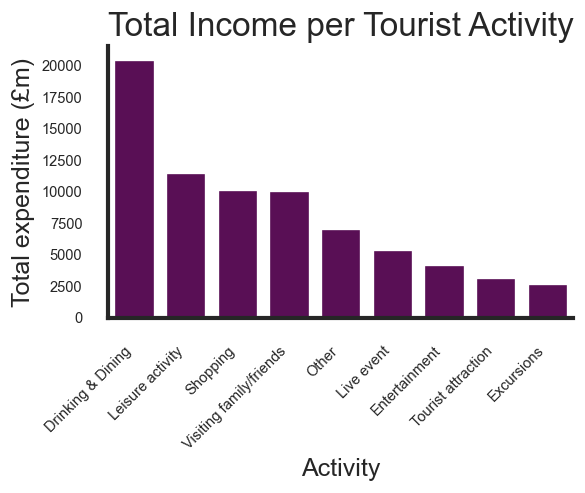

In [3]:
sns.set_style('white')

sns.set_context('poster', font_scale=0.4)
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

a=sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditue')
),
            x='activity_type',
            y='total_expenditue',
           color='#650360')

sns.despine()
a.set_xlabel('Activity', fontsize = 15)
a.set_ylabel('Total expenditure (£m)', fontsize = 15)
a.set_title('Total Income per Tourist Activity', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

It can clearly been seen that Drinking & Dining generates the highest income for Scotland - around double that of any other activity.

# Question 1.2

## Which kind of activity generates the most visits to sites?

In [4]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

activity_type
Drinking & Dining          378
Leisure activity           320
Visiting family/friends    315
Other                      182
Live event                 130
Shopping                   125
Entertainment               89
Tourist attraction          87
Excursions                  68
Name: value, dtype: int64

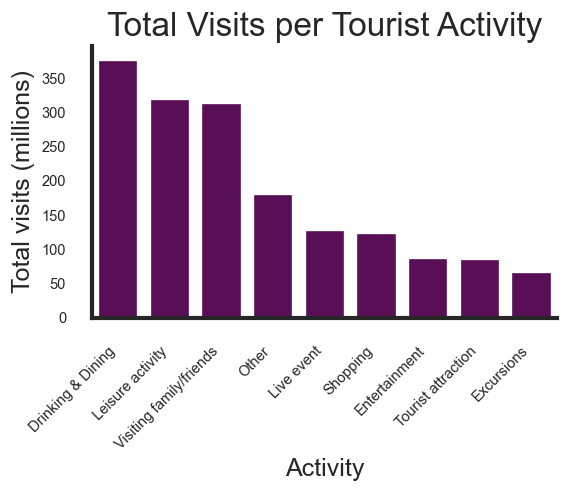

In [5]:
f=sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='activity_type',
            y='total_visits',
           color='#650360')

sns.despine()
f.set_xlabel('Activity', fontsize = 15)
f.set_ylabel('Total visits (millions)', fontsize = 15)
f.set_title('Total Visits per Tourist Activity', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

Similar to Q1.1, the activity that generates the most amount of visits to Scotland is Drinking & Dining. It should be noted that these activities are grouped, and that Visiting family/friends accounts for the most amount of visits for a single activity.

# Question 2

## Is there a particular key demographic of visitors we should be focusing on?
## Who spends the most?
## Who visits the most?

The demographics data set is set out in such a way that it is difficult to fully analyse all of the different demographic variables at once, as they are set to 'All' by default when one single variable is being changed.

To have an overview of the data, a new column was mutated to record instances of when 'All' was not being recorded.

In [6]:
demographics = (
    demographics
    .assign(demo = np.where(demographics.age != 'All', demographics.age,
                   np.where(demographics.marital_status != 'All', demographics.marital_status,
                   np.where(demographics.gender != 'All', demographics.gender,
                   np.where(demographics.employment_status != 'All', demographics.employment_status,
                   np.where(demographics.children != 'All', demographics.children,
                   np.where(demographics.access_to_car != 'All', demographics.access_to_car,
                   np.where(demographics.social_grade != 'All', demographics.social_grade, 'All')))))))
           )
)

demographics

year                 units  value breakdown_of_domestic_tourism  \
0    2013        Million Visits     22                        Visits   
1    2013        Million Visits     58                        Visits   
2    2016        Million Visits     23                        Visits   
3    2019        Million Visits     56                        Visits   
4    2015        Million Visits     52                        Visits   
..    ...                   ...    ...                           ...   
303  2019  million pounds (GBP)    715                   Expenditure   
304  2018        Million Visits     15                        Visits   
305  2015        Million Visits     15                        Visits   
306  2013        Million Visits     46                        Visits   
307  2016        Million Visits     11                        Visits   

             age marital_status gender       employment_status children  \
0    45-54 years            All    All                     All      All   
1            All            All   Male                     All      All   
2    25-34 years            All    All                     All      All   
3            All    Not Married    All                     All      All   
4            All    Not Married    All                     All      All   
..           ...            ...    ...                     ...      ...   
303          All            All    All  Unemployed/not working      All   
304          All            All    All  Unemployed/not working      All   
305          All            All    All  Unemployed/not working      All   
306          All            All    All  Unemployed/not working      All   
307          All            All    All  Unemployed/not working      All   

    access_to_car social_grade                    demo  
0             All          All             45-54 years  
1             All          All                    Male  
2             All          All             25-34 years  
3             All          All             Not Married  
4             All          All             Not Married  
..            ...          ...                     ...  
303           All          All  Unemployed/not working  
304           All          All  Unemployed/not working  
305           All          All  Unemployed/not working  
306           All          All  Unemployed/not working  
307           All          All  Unemployed/not working  

[308 rows x 12 columns]

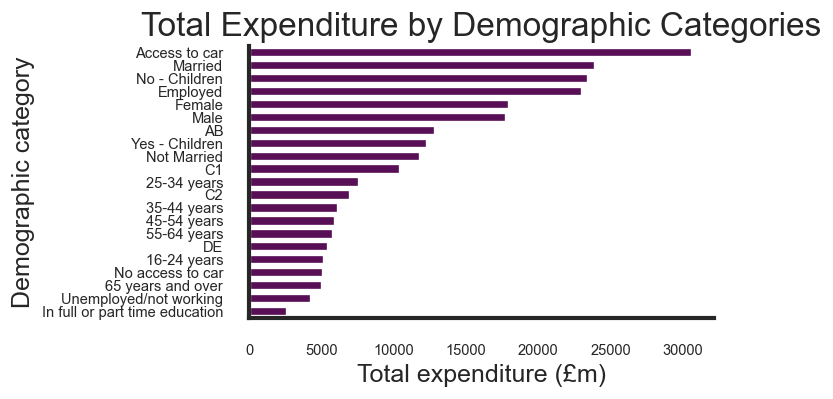

In [7]:
j=sns.barplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .replace({'Employed/self-employed (full or part time)': 'Employed',
             'Access to car (1+)': 'Access to car',
             'No access to car (0)': 'No access to car'})
    .groupby('demo')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='total_expenditure',
            y='demo',
            color='#650360')

sns.despine()
j.set_xlabel('Total expenditure (£m)', fontsize = 15)
j.set_ylabel('Demographic category', fontsize = 15)
j.set_title('Total Expenditure by Demographic Categories', fontsize = 20)

plt.show()

This barplot illustrates what a target demographic looks like in terms of total expenditure. They are someone who:

* Has access to a car
* Is married
* Has no children (perhaps grown up children)
* Is employed

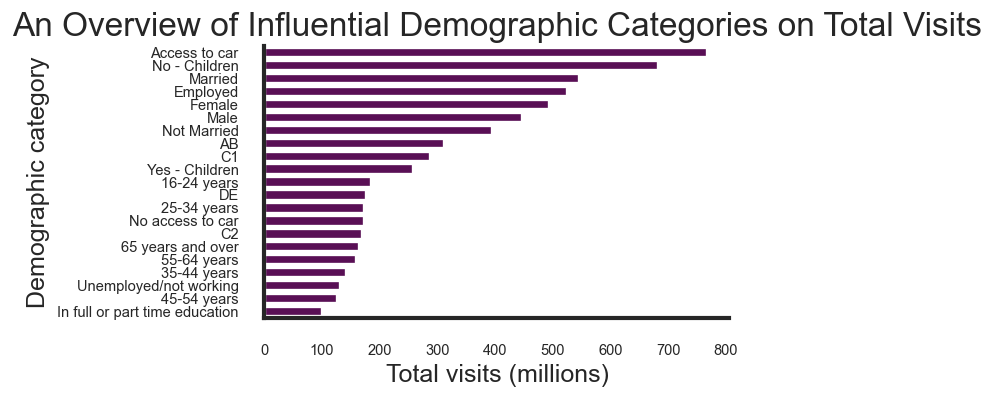

In [9]:
k=sns.barplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .replace({'Employed/self-employed (full or part time)': 'Employed',
             'Access to car (1+)': 'Access to car',
             'No access to car (0)': 'No access to car'})
    .groupby('demo')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='total_visits',
            y='demo',
            color='#650360')

sns.despine()
k.set_xlabel('Total visits (millions)', fontsize = 15)
k.set_ylabel('Demographic category', fontsize = 15)
k.set_title('An Overview of Influential Demographic Categories on Total Visits', fontsize = 20)

plt.show()

This barplot shows the same information, this time in terms of visits. The top 4 categories are the same as for total expenditure, confirming that the target demographic should be:

* Has access to a car
* Is married
* Has no children (perhaps grown up children)
* Is employed

Looking at Age in more detail:

In [10]:
(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('age')
    .value
    .sum()
    .sort_values(ascending=False)
)

age
25-34 years          7598
35-44 years          6137
45-54 years          5939
55-64 years          5792
16-24 years          5217
65 years and over    5070
Name: value, dtype: int64

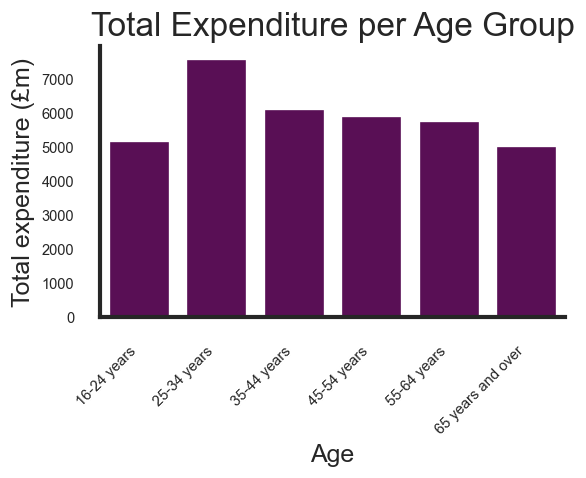

In [11]:
l=sns.barplot(data=(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('age')
    .value
    .sum()
    .reset_index(name='total_expenditure')
),
            x='age',
            y='total_expenditure',
            color='#650360')

sns.despine()
l.set_xlabel('Age', fontsize = 15)
l.set_ylabel('Total expenditure (£m)', fontsize = 15)
l.set_title('Total Expenditure per Age Group', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

25-34 years are the age group that have spent the most amount over the period in the data.

Looking at some patterns over time:

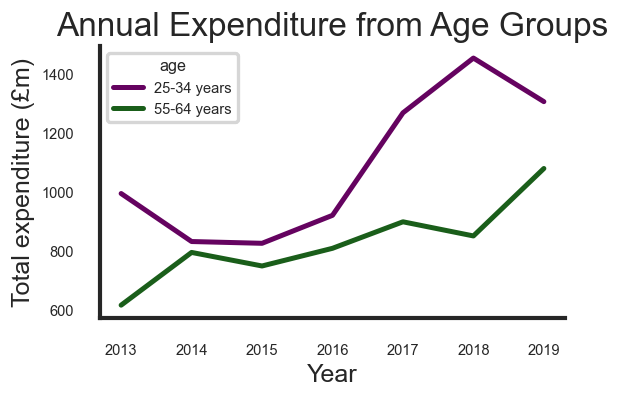

In [13]:
na=sns.lineplot(data=(
    demographics
    .loc[(demographics.age.isin(['25-34 years', '55-64 years'])) &
         (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
             hue='age',
             palette=['#650360', '#1a5e1a'])

sns.despine()
na.set_xlabel('Year', fontsize = 15)
na.set_ylabel('Total expenditure (£m)', fontsize = 15)
na.set_title('Annual Expenditure from Age Groups', fontsize = 20)
plt.show()

Looking at these two age groups in more detail, it can be seen that if patterns were to continue, the 55-64 years could be a demographic to target.

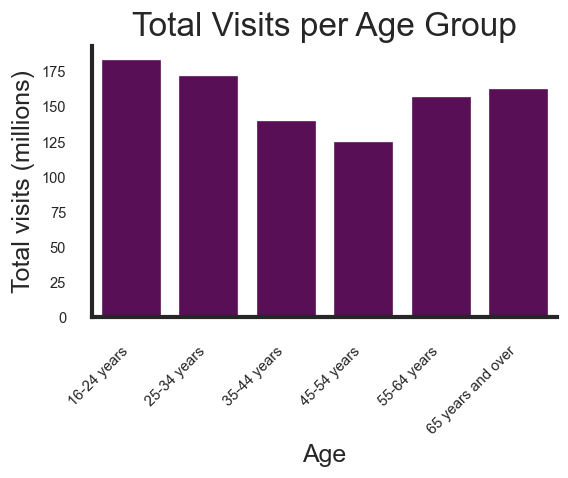

In [14]:
o=sns.barplot(data=(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('age')
    .value
    .sum()
    .reset_index(name='total_visits')
),
            x='age',
            y='total_visits',
            color='#650360')

sns.despine()
o.set_xlabel('Age', fontsize = 15)
o.set_ylabel('Total visits (millions)', fontsize = 15)
o.set_title('Total Visits per Age Group', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

In terms of total visits, it is the 16-24 years that are highest, only slightly higher than 25-34 years.

Text(0.5, 1.0, 'Annual Visits from Age Groups')

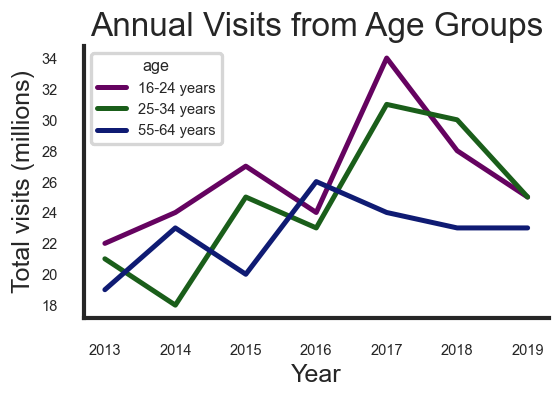

In [16]:
qa=sns.lineplot(data=(
    demographics
    .loc[(demographics.age.isin(['25-34 years', '55-64 years', '16-24 years'])) &
         (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
             hue='age',
             palette=['#650360', '#1a5e1a', '#0f1b73'])

sns.despine()
qa.set_xlabel('Year', fontsize = 15)
qa.set_ylabel('Total visits (millions)', fontsize = 15)
qa.set_title('Annual Visits from Age Groups', fontsize = 20)

Looking at age groups of interest in terms of total visits, what we can again see is that the 55-64 years have a good upward trajectory compared to the leading age groups, and could be an area of focus.

# Question 3

## What type of locations receive the most visits?
## What kinds of locations do people spend the most in?

In [20]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

location_type
City               20497
Town or Village    12225
Seaside             3816
Countryside         3788
Name: value, dtype: int64

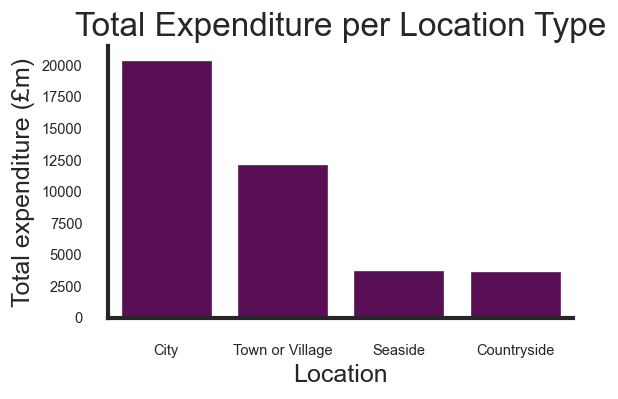

In [21]:
v=sns.barplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='location_type',
            y='total_expenditure',
            color='#650360')

sns.despine()
v.set_xlabel('Location', fontsize = 15)
v.set_ylabel('Total expenditure (£m)', fontsize = 15)
v.set_title('Total Expenditure per Location Type', fontsize = 20)

plt.xticks(rotation=0, ha='center')
plt.show()

In terms of total expenditure, City is by far the highest.

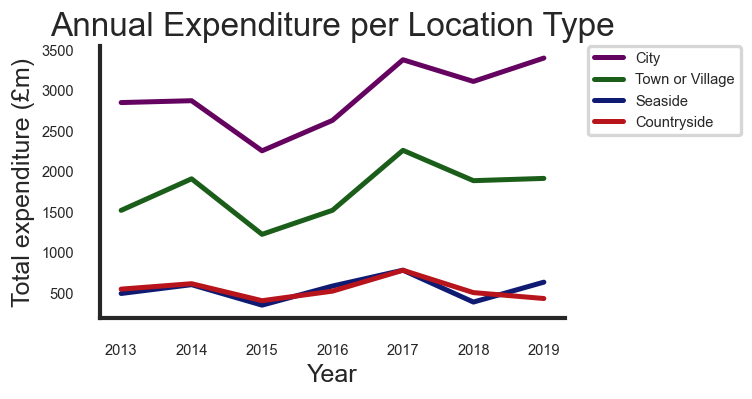

In [22]:
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10
w=sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') &
         (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
),
            x='year',
            y='total_expenditure_per_year',
            hue='location_type',
            palette=['#650360', '#1a5e1a', '#0f1b73', '#b8141c'])

sns.despine()
w.set_xlabel('Year', fontsize = 15)
w.set_ylabel('Total expenditure (£m)', fontsize = 15)
w.set_title('Annual Expenditure per Location Type', fontsize = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Plotting this over time, there is little evidence to suggest that this will change any time soon.

In [23]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

location_type
City               431
Town or Village    360
Countryside        133
Seaside            108
Name: value, dtype: int64

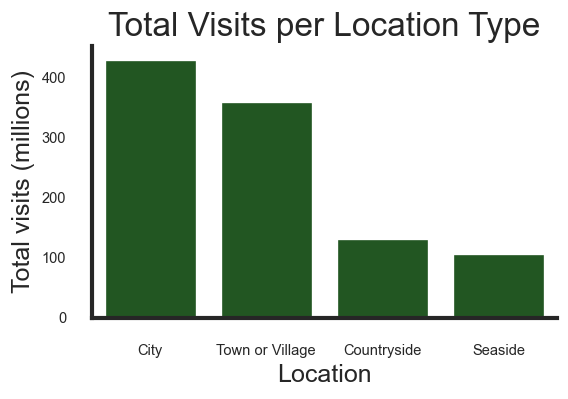

In [24]:
w=sns.barplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='location_type',
            y='total_visits',
            color='#1a5e1a')

sns.despine()
w.set_xlabel('Location', fontsize = 15)
w.set_ylabel('Total visits (millions)', fontsize = 15)
w.set_title('Total Visits per Location Type', fontsize = 20)

plt.xticks(rotation=0, ha='center')
plt.show()

In terms of total visits, City is still the most popular, but Town or Village receive a large amount of visits as well.

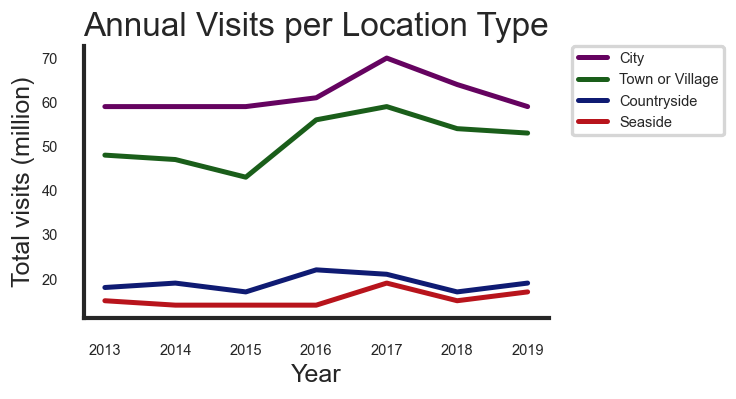

In [25]:
w=sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') &
         (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits_per_year')
),
            x='year',
            y='total_visits_per_year',
            hue='location_type',
            palette=['#650360', '#1a5e1a', '#0f1b73', '#b8141c'])

sns.despine()
w.set_xlabel('Year', fontsize = 15)
w.set_ylabel('Total visits (million)', fontsize = 15)
w.set_title('Annual Visits per Location Type', fontsize = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Plotting this over time tells a slightly different story to total expenditure. It can be seen that there is much less of a difference in terms of visits and it is feasible that this could change at some point.

# Question 4

## Is there a particular method of travel our visitors arrive by?

In [17]:
(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('transport_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

transport_type
Car      633.2
Rail     111.2
Other     94.6
Bus       90.5
Plane      7.1
Boat       3.3
Name: value, dtype: float64

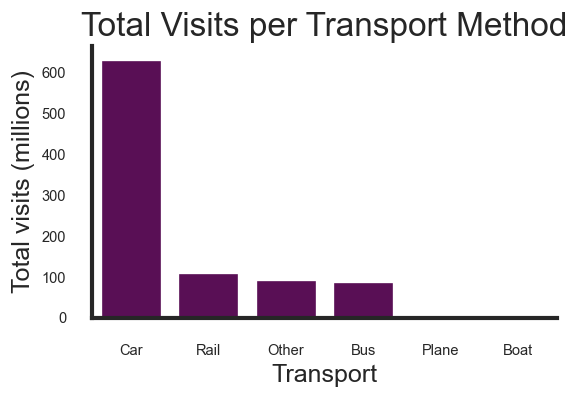

In [18]:
x=sns.barplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('transport_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='transport_type',
            y='total_visits',
            color='#650360')

sns.despine()
x.set_xlabel('Transport', fontsize = 15)
x.set_ylabel('Total visits (millions)', fontsize = 15)
x.set_title('Total Visits per Transport Method', fontsize = 20)

plt.xticks(rotation=0, ha='center')
plt.show()

Car is nearly 6 times more popular than any other form of transport.

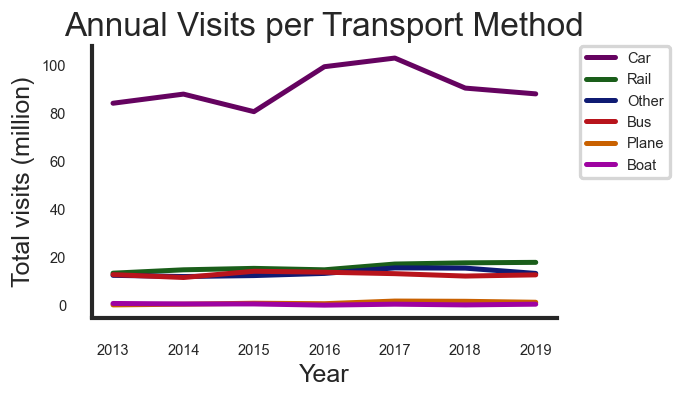

In [19]:
y=sns.lineplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['transport_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='year',
            y='total_visits',
        hue='transport_type',
        palette=['#650360', '#1a5e1a', '#0f1b73', '#b8141c', '#c96100', '#9e03a1'])

sns.despine()
y.set_xlabel('Year', fontsize = 15)
y.set_ylabel('Total visits (million)', fontsize = 15)
y.set_title('Annual Visits per Transport Method', fontsize = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Looking at this trend over time, there is no suggestion that this will change.

# Question 5

## When looking at regional tourism, what insights can we gain?
## Where are our visitors from?
## How do they differ in the money they spend, nights they spend in Scotland, or number of visits they do?

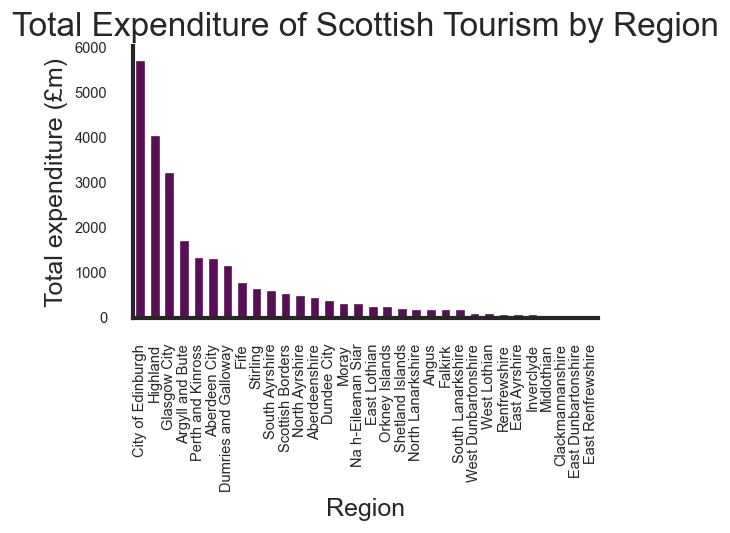

In [30]:
z=sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure') &
         (regional_tourism.region_of_residence == 'All of GB'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            y='total_expenditure',
            x='region_name',
             color='#650360')

sns.despine()
z.set_xlabel('Region', fontsize = 15)
z.set_ylabel('Total expenditure (£m)', fontsize = 15)
z.set_title('Total Expenditure of Scottish Tourism by Region', fontsize = 20)


plt.xticks(rotation=90, ha='center')

plt.show()

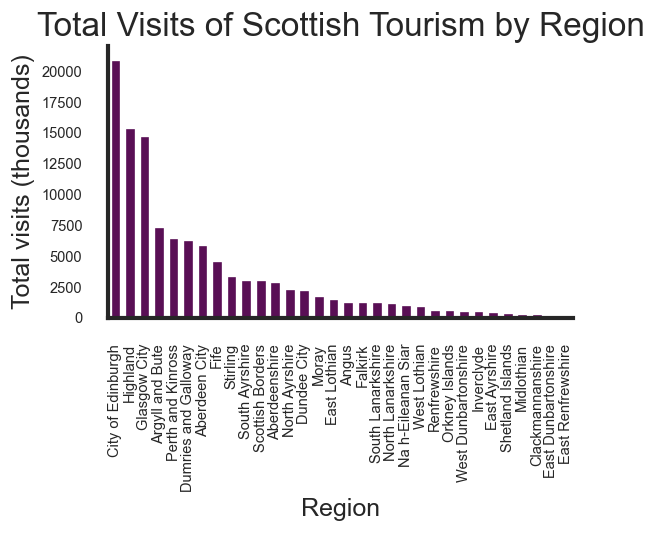

In [32]:
aa=sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Visits') &
         (regional_tourism.region_of_residence == 'All of GB'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            y='total_visits',
            x='region_name',
            color='#650360')

sns.despine()
aa.set_xlabel('Region', fontsize = 15)
aa.set_ylabel('Total visits (thousands)', fontsize = 15)
aa.set_title('Total Visits of Scottish Tourism by Region', fontsize = 20)


plt.xticks(rotation=90, ha='center')

plt.show()

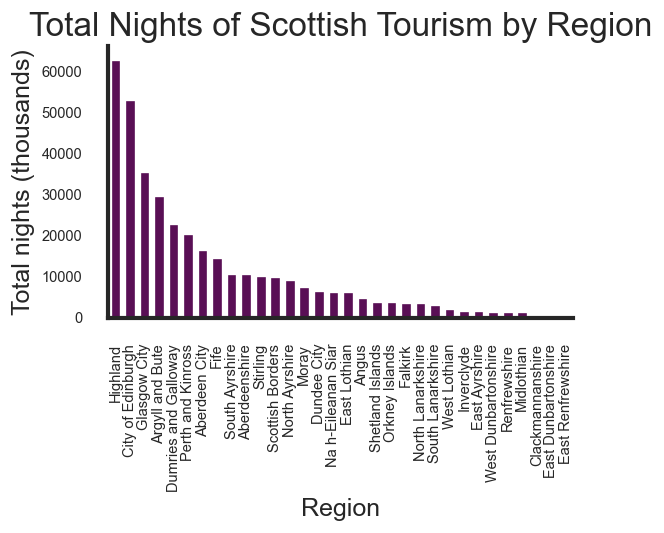

In [33]:
ab=sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Nights') &
         (regional_tourism.region_of_residence == 'All of GB'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights')
),
            y='total_nights',
            x='region_name',
             color='#650360')

sns.despine()
ab.set_xlabel('Region', fontsize = 15)
ab.set_ylabel('Total nights (thousands)', fontsize = 15)
ab.set_title('Total Nights of Scottish Tourism by Region', fontsize = 20)


plt.xticks(rotation=90, ha='center')

plt.show()

From the 3 plots above, it can be stated that the four most popular tourism regions are:

* City of Edinburgh
* Highland
* Glasgow City 
* Argyll and Bute

In [34]:
regional_tourism_expenditure = (
    regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('region_of_residence')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
)

regional_tourism_expenditure

region_of_residence  total_expenditure
0           All of GB              26291
1             England              15781
2            Scotland               9827

In [35]:
new_row_expenditure = {
    'region_of_residence': 'Rest of GB',
    'total_expenditure': (26291 - 15781 - 9827)
}

new_row_expenditure

{'region_of_residence': 'Rest of GB', 'total_expenditure': 683}

In [36]:
regional_tourism_expenditure = regional_tourism_expenditure.append(new_row_expenditure, ignore_index=True)

regional_tourism_expenditure

/var/folders/xp/pxq000_97vz2g8qfqw7qtgvm0000gn/T/ipykernel_14144/741911556.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_tourism_expenditure = regional_tourism_expenditure.append(new_row_expenditure, ignore_index=True)


region_of_residence  total_expenditure
0           All of GB              26291
1             England              15781
2            Scotland               9827
3          Rest of GB                683

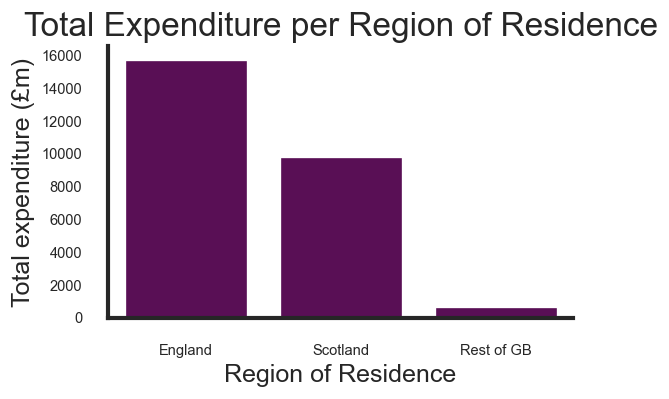

In [39]:
ca=sns.barplot(data=(
    regional_tourism_expenditure
    .loc[regional_tourism_expenditure.region_of_residence != 'All of GB', :]
),
           x='region_of_residence',
           y='total_expenditure',
                        color='#650360')

sns.despine()
ca.set_xlabel('Region of Residence', fontsize = 15)
ca.set_ylabel('Total expenditure (£m)', fontsize = 15)
ca.set_title('Total Expenditure per Region of Residence', fontsize = 20)

plt.xticks(rotation=0, ha='center')
plt.show()

In [40]:
regional_tourism_visits = (
    regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003') & 
         (regional_tourism.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('region_of_residence')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
)

regional_tourism_visits

region_of_residence  total_visits
0           All of GB        111034
1            Scotland         55725
2             England         53143

In [41]:
new_row_visits = {
    'region_of_residence': 'Rest of GB',
    'total_visits': (111034 - 55725 - 53143)
}

new_row_visits

{'region_of_residence': 'Rest of GB', 'total_visits': 2166}

In [42]:
regional_tourism_visits = regional_tourism_visits.append(new_row_visits, ignore_index=True)

regional_tourism_visits

/var/folders/xp/pxq000_97vz2g8qfqw7qtgvm0000gn/T/ipykernel_14144/2765205528.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_tourism_visits = regional_tourism_visits.append(new_row_visits, ignore_index=True)


region_of_residence  total_visits
0           All of GB        111034
1            Scotland         55725
2             England         53143
3          Rest of GB          2166

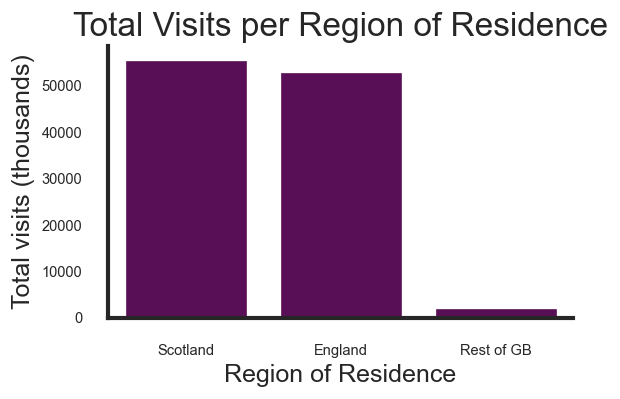

In [43]:
da=sns.barplot(data=(
    regional_tourism_visits
    .loc[regional_tourism_visits.region_of_residence != 'All of GB', :]
),
           x='region_of_residence',
           y='total_visits',
                                       color='#650360')

sns.despine()
da.set_xlabel('Region of Residence', fontsize = 15)
da.set_ylabel('Total visits (thousands)', fontsize = 15)
da.set_title('Total Visits per Region of Residence', fontsize = 20)

plt.xticks(rotation=0, ha='center')
plt.show()

In [44]:
regional_tourism_nights = (
    regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003')
         & (regional_tourism.breakdown_of_domestic_tourism == 'Nights'), :]
    .groupby('region_of_residence')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights')
)

regional_tourism_nights

region_of_residence  total_nights
0           All of GB        378896
1             England        211241
2            Scotland        158278

In [45]:
new_row_nights = {
    'region_of_residence': 'Rest of GB',
    'total_nights': (378896 - 211241 - 158278)
}

new_row_nights

{'region_of_residence': 'Rest of GB', 'total_nights': 9377}

In [46]:
regional_tourism_nights = regional_tourism_nights.append(new_row_nights, ignore_index=True)

regional_tourism_nights

/var/folders/xp/pxq000_97vz2g8qfqw7qtgvm0000gn/T/ipykernel_14144/3540154970.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_tourism_nights = regional_tourism_nights.append(new_row_nights, ignore_index=True)


region_of_residence  total_nights
0           All of GB        378896
1             England        211241
2            Scotland        158278
3          Rest of GB          9377

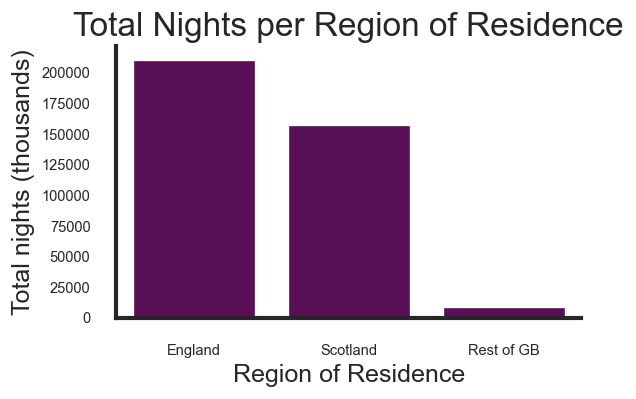

In [47]:
ea=sns.barplot(data=(
    regional_tourism_nights
    .loc[regional_tourism_nights.region_of_residence != 'All of GB', :]
),
           x='region_of_residence',
           y='total_nights',
                                                      color='#650360')

sns.despine()
ea.set_xlabel('Region of Residence', fontsize = 15)
ea.set_ylabel('Total nights (thousands)', fontsize = 15)
ea.set_title('Total Nights per Region of Residence', fontsize = 20)

plt.xticks(rotation=0, ha='center')
plt.show()

The above 3 graphs show that:

* Tourists from England spend the most and stay the most nights
* Tourists from Scotland contribute the most visits
* Tourists from other parts of the UK make up a very small percentage of UK tourism in Scotland

# Question 6

## What type of accommodation is most popular?
## Is there a difference by location?

In [48]:
accommodation_occupancy = (
    accommodation_occupancy
    .assign(accom = np.where(accommodation_occupancy.weekday_weekend != 'All', accommodation_occupancy.weekday_weekend,
                    np.where(accommodation_occupancy.size_of_accommodation != 'All', accommodation_occupancy.size_of_accommodation,
                    np.where(accommodation_occupancy.location != 'All', accommodation_occupancy.location, 'All')))
           )
)

accommodation_occupancy

year  value       units accommodation_type   occupancy_type  \
0    2012  52.32  Percentage   Guest House/B&B    Room Occupancy   
1    2015  49.18  Percentage   Guest House/B&B    Room Occupancy   
2    2018  63.57  Percentage   Guest House/B&B    Room Occupancy   
3    2013  53.35  Percentage   Guest House/B&B    Room Occupancy   
4    2018  40.45  Percentage   Guest House/B&B    Room Occupancy   
..    ...    ...         ...                ...              ...   
706  2015  73.47  Percentage            Hotels    Room Occupancy   
707  2013  35.69  Percentage           Hostels     Bed Occupancy   
708  2011  38.62  Percentage           Hostels     Bed Occupancy   
709  2015  24.37  Percentage            Hotels    Room Occupancy   
710  2017  56.37  Percentage           Hostels     Bed Occupancy   

    weekday_weekend size_of_accommodation                location  \
0               All                   All  Accessible Small Towns   
1               All                   All       Large Urban Areas   
2               All                   All       Large Urban Areas   
3               All                   All        Accessible Rural   
4               All                   All        Accessible Rural   
..              ...                   ...                     ...   
706             All         Rooms: 51-100                     All   
707             All                   All            Remote Rural   
708             All                   All  Accessible Small Towns   
709             All          Rooms: 01-03                     All   
710             All                   All                     All   

     is_accessible  is_urban                   accom  
0             True     False  Accessible Small Towns  
1             True      True       Large Urban Areas  
2             True      True       Large Urban Areas  
3             True     False        Accessible Rural  
4             True     False        Accessible Rural  
..             ...       ...                     ...  
706          False     False           Rooms: 51-100  
707          False     False            Remote Rural  
708           True     False  Accessible Small Towns  
709          False     False            Rooms: 01-03  
710          False     False                     All  

[711 rows x 11 columns]

In [49]:
(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('accommodation_type')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage')
)

accommodation_type  average_occupancy_percentage
0                   Hotels                      56.075238
1                  Hostels                      48.565139
2            Self Catering                      48.330741
3          Guest House/B&B                      45.164192
4  Caravan & Camping Parks                      38.920278

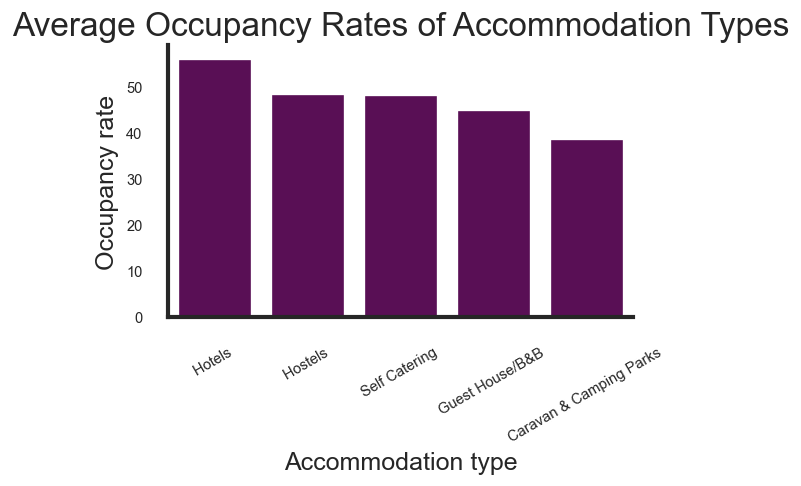

In [55]:
fa=sns.barplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('accommodation_type')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage')
),
            x='accommodation_type',
            y='average_occupancy_percentage',
            color='#650360')

sns.despine()
fa.set_xlabel('Accommodation type', fontsize = 15)
fa.set_ylabel('Occupancy rate', fontsize = 15)
fa.set_title('Average Occupancy Rates of Accommodation Types', fontsize = 20)

plt.xticks(rotation=30, ha='center')
plt.show()

Hotels tend to have the highest occupancy rates of the different accommodation types, although the range is quite narrow (38% - 56%).

In [56]:
(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All') & (accommodation_occupancy.location != 'All'), :]
    .groupby('location')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_location')
)

location  average_occupancy_percentage_per_location
0       Large Urban Areas                                  56.047778
1       Other Urban Areas                                  52.094603
2        Accessible Rural                                  47.754286
3  Accessible Small Towns                                  46.960317
4            Remote Rural                                  46.454444
5      Remote Small Towns                                  45.715397

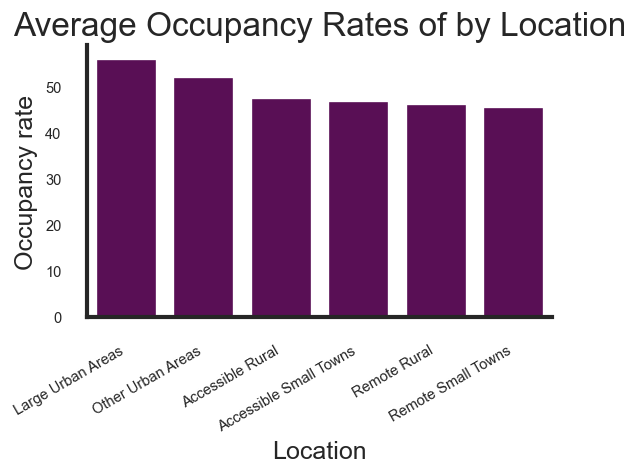

In [58]:
ga=sns.barplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All') & (accommodation_occupancy.location != 'All'), :]
    .groupby('location')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_location')
),
            x='location',
            y='average_occupancy_percentage_per_location',
                        color='#650360')

sns.despine()
ga.set_xlabel('Location', fontsize = 15)
ga.set_ylabel('Occupancy rate', fontsize = 15)
ga.set_title('Average Occupancy Rates of by Location', fontsize = 20)

plt.xticks(rotation=30, ha='right')
plt.show()

Looking at the average occupancy rate in different locations, it can be seen that large urban areas tend to have the highest, but like above, the range is narrow (45% - 56%).

# Question 7 

## Is there any way to predict spending and visits for Visit Scotland?

In general, the data in its current form does not lend itself well to modeling as it is all very summarised and in separate tables which either leads to very high or very low r-squared values when performing linear regression. In addition, the values are not in an optimal format to perform modeling as both 'Expenditure' and 'Visits' are in the same column.

If Visit Scotland wanted to benefit from advanced analytics and predictive modeling in the future, they would have to overhaul and improve their data collection. Data should be reported in an unsummarised format as this would allow modeling to be completed. In addition, data should be collected more regularly, perhaps monthly, and in a standardised format to allow joining between different tables to check for interactions and test dependent variable performance.

To give an example of how this could be completed, some extra analysis and model building was done by using the `international.csv` file and filtering for only tourists from the USA, as these accounted for the highest expenditure, visits and nights. 

An unsupervised learning technique, k-means clustering, was applied to this data to attempt to label some of the data based on their spending habits.

These labels were then independently modeled and found to be significant predictors, and were subsequently added to the original data before being modeled again.

This process was carried out in R, before a csv was written and used for modeling.

An example of k-means clustering is shown below using Python.

The entire work-flow of the 'case study' can be found below.

In [59]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [60]:
kmeans = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

In [61]:
kmeans.fit(international.loc[international.country == 'USA', ['visits_thousands', 'expenditure_millions']])

KMeans(init='random', n_clusters=4)

In [62]:
kmeans.inertia_

14867.773672922674

In [63]:
kmeans.cluster_centers_

array([[ 4.39654565,  3.38897815],
       [ 1.0030299 ,  0.48128429],
       [ 9.52165266, 12.33586093],
       [19.99771962, 33.33356797]])

In [64]:
kmeans.n_iter_

25

In [65]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300
}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(international.loc[international.country == 'USA', ['visits_thousands', 'expenditure_millions']])
    sse.append(kmeans.inertia_)

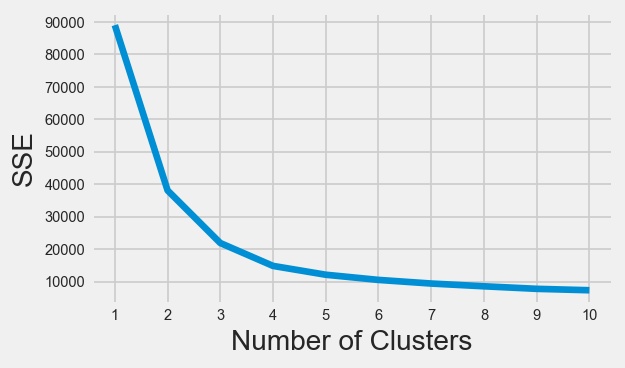

In [66]:
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [67]:
kl = KneeLocator(
    range(1, 11), sse, curve='convex', direction='decreasing'
)

kl.elbow

3

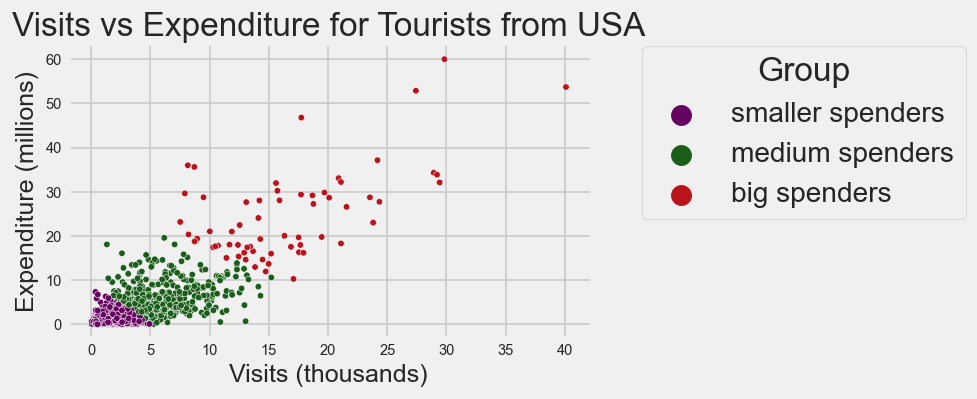

In [68]:
z=sns.scatterplot(data=usa,
               x='visits_thousands',
               y='expenditure_millions',
               hue='cluster_group',
               s=15,
               palette=['#650360', '#1a5e1a', '#b8141c'])

sns.despine()
z.set_xlabel('Visits (thousands)', fontsize = 15)
z.set_ylabel('Expenditure (millions)', fontsize = 15)
z.set_title('Visits vs Expenditure for Tourists from USA', fontsize = 20)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left',
           borderaxespad=0, title='Group', title_fontsize='x-large', fontsize='large')

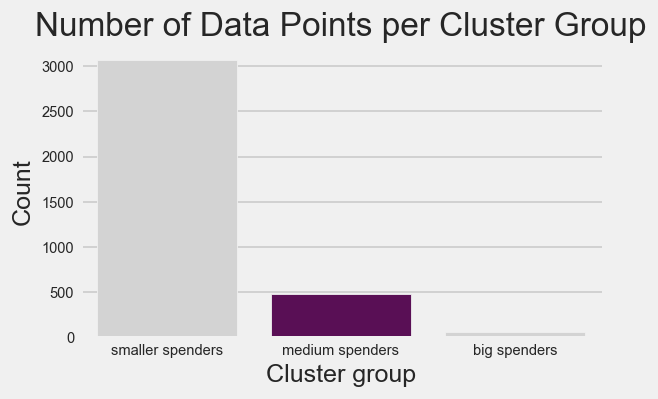

In [69]:
fa=sns.barplot(data=(
    usa
    .groupby('cluster_group')
    .expenditure_millions
    .count()
    .sort_values(ascending=False)
    .reset_index(name='total_number')
),
            y='total_number',
            x='cluster_group',
            palette=['lightgrey', '#650360', 'lightgrey'])

sns.despine()

fa.set_xlabel('Cluster group', fontsize = 15)
fa.set_ylabel('Count', fontsize = 15)
fa.set_title('Number of Data Points per Cluster Group', fontsize = 20)

plt.xticks(rotation=0, ha='center')

plt.show()

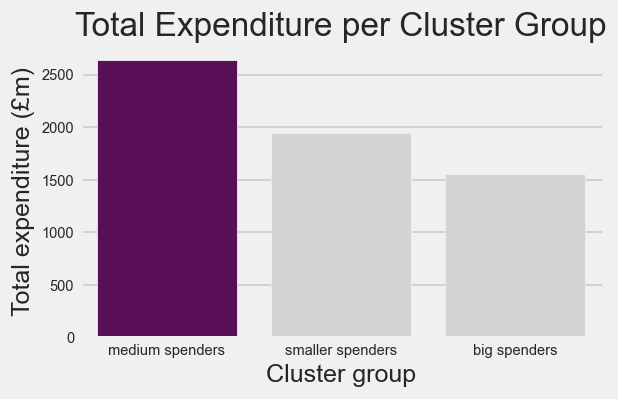

In [70]:
fa=sns.barplot(data=(
    usa
    .groupby('cluster_group')
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            y='total_expenditure',
            x='cluster_group',
            palette=['#650360', 'lightgrey', 'lightgrey'])

sns.despine()

fa.set_xlabel('Cluster group', fontsize = 15)
fa.set_ylabel('Total expenditure (£m)', fontsize = 15)
fa.set_title('Total Expenditure per Cluster Group', fontsize = 20)

plt.xticks(rotation=0, ha='center')

plt.show()

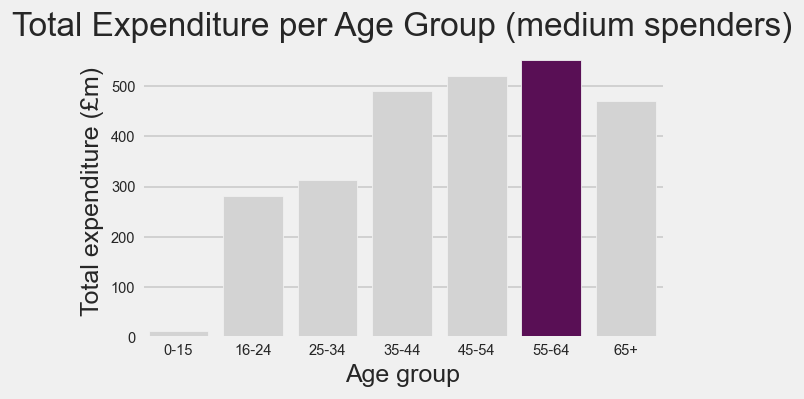

In [71]:
ga=sns.barplot(data=(
    usa
    .loc[usa.cluster_group == 'medium spenders', :]
    .groupby('age')
    .expenditure_millions
    .sum()
    .reset_index(name='total_expenditure')
),
            y='total_expenditure',
            x='age',
            palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
                     'lightgrey', '#650360', 'lightgrey'])

sns.despine()

ga.set_xlabel('Age group', fontsize = 15)
ga.set_ylabel('Total expenditure (£m)', fontsize = 15)
ga.set_title('Total Expenditure per Age Group (medium spenders)', fontsize = 20)

plt.xticks(rotation=0, ha='center')

plt.show()

In [85]:
import pandas_profiling
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Modeling USA data without cluster groups

In [127]:
international = pd.read_csv('clean_data/international.csv')

In [128]:
international.nights_thousands = international.nights_thousands.replace(',','', regex=True)
international.nights_thousands = pd.to_numeric(international.nights_thousands)

international['year'] = international['year'].astype('category')

international

year                country  purpose mode     duration    age  \
0      2002                    USA  Holiday  Air   4-7 nights   0-15   
1      2002                    USA  Holiday  Air   4-7 nights  16-24   
2      2002                    USA  Holiday  Air   4-7 nights  25-34   
3      2002                    USA  Holiday  Air   4-7 nights  45-54   
4      2002                    USA  Holiday  Air   4-7 nights    65+   
...     ...                    ...      ...  ...          ...    ...   
32044  2019              Argentina  Holiday  Air   15+ nights    65+   
32045  2019              Argentina    Other  Air  8-14 nights  25-34   
32046  2019  Rest of Latin America  Holiday  Air  8-14 nights  25-34   
32047  2019  Rest of Latin America  Holiday  Air  8-14 nights  45-54   
32048  2019  Rest of Latin America  Holiday  Air   15+ nights  35-44   

       visits_thousands  nights_thousands  expenditure_millions  
0              0.270000          1.600000              0.160000  
1              1.080000          4.620000              0.250000  
2              0.990000          5.030000              0.810000  
3              0.350000          1.800000              0.080000  
4              1.660000         10.090000              0.620000  
...                 ...               ...                   ...  
32044          1.575168         14.176511              0.897375  
32045          0.631421          3.157103              0.228890  
32046          2.243179         11.633949              0.877631  
32047          0.550858          1.714171              0.135526  
32048          0.553057          1.147342              0.103797  

[32049 rows x 9 columns]

### Create dummy variables for categorical

In [129]:
international_usa = (
    international
    .loc[international.country == 'USA', :]
)
international_usa

year country  purpose mode    duration    age  visits_thousands  \
0      2002     USA  Holiday  Air  4-7 nights   0-15          0.270000   
1      2002     USA  Holiday  Air  4-7 nights  16-24          1.080000   
2      2002     USA  Holiday  Air  4-7 nights  25-34          0.990000   
3      2002     USA  Holiday  Air  4-7 nights  45-54          0.350000   
4      2002     USA  Holiday  Air  4-7 nights    65+          1.660000   
...     ...     ...      ...  ...         ...    ...               ...   
31675  2019     USA      VFR  Air  15+ nights  25-34          4.051227   
31676  2019     USA      VFR  Air  15+ nights  35-44          0.636022   
31677  2019     USA      VFR  Air  15+ nights  55-64          0.413906   
31678  2019     USA      VFR  Air  15+ nights    65+          0.413906   
31679  2019     USA    Other  Air  15+ nights  35-44          0.533417   

       nights_thousands  expenditure_millions  
0              1.600000              0.160000  
1              4.620000              0.250000  
2              5.030000              0.810000  
3              1.800000              0.080000  
4             10.090000              0.620000  
...                 ...                   ...  
31675         33.920169              0.630585  
31676          1.996985              0.079477  
31677          2.599171              0.651369  
31678          2.165976              0.037496  
31679          2.223233              0.001605  

[3609 rows x 9 columns]

In [130]:
international_usa = pd.get_dummies(international_usa, drop_first=True)

international_usa

visits_thousands  nights_thousands  expenditure_millions  year_2003  \
0              0.270000          1.600000              0.160000          0   
1              1.080000          4.620000              0.250000          0   
2              0.990000          5.030000              0.810000          0   
3              0.350000          1.800000              0.080000          0   
4              1.660000         10.090000              0.620000          0   
...                 ...               ...                   ...        ...   
31675          4.051227         33.920169              0.630585          0   
31676          0.636022          1.996985              0.079477          0   
31677          0.413906          2.599171              0.651369          0   
31678          0.413906          2.165976              0.037496          0   
31679          0.533417          2.223233              0.001605          0   

       year_2004  year_2005  year_2006  year_2007  year_2008  year_2009  ...  \
0              0          0          0          0          0          0  ...   
1              0          0          0          0          0          0  ...   
2              0          0          0          0          0          0  ...   
3              0          0          0          0          0          0  ...   
4              0          0          0          0          0          0  ...   
...          ...        ...        ...        ...        ...        ...  ...   
31675          0          0          0          0          0          0  ...   
31676          0          0          0          0          0          0  ...   
31677          0          0          0          0          0          0  ...   
31678          0          0          0          0          0          0  ...   
31679          0          0          0          0          0          0  ...   

       mode_Tunnel  duration_15+ nights  duration_4-7 nights  \
0                0                    0                    1   
1                0                    0                    1   
2                0                    0                    1   
3                0                    0                    1   
4                0                    0                    1   
...            ...                  ...                  ...   
31675            0                    1                    0   
31676            0                    1                    0   
31677            0                    1                    0   
31678            0                    1                    0   
31679            0                    1                    0   

       duration_8-14 nights  age_16-24  age_25-34  age_35-44  age_45-54  \
0                         0          0          0          0          0   
1                         0          1          0          0          0   
2                         0          0          1          0          0   
3                         0          0          0          0          1   
4                         0          0          0          0          0   
...                     ...        ...        ...        ...        ...   
31675                     0          0          1          0          0   
31676                     0          0          0          1          0   
31677                     0          0          0          0          0   
31678                     0          0          0          0          0   
31679                     0          0          0          1          0   

       age_55-64  age_65+  
0              0        0  
1              0        0  
2              0        0  
3              0        0  
4              0        1  
...          ...      ...  
31675          0        0  
31676          0        0  
31677          1        0  
31678          0        1  
31679          0        0  

[3609 rows x 35 columns]

### Create response and predictor variables from the independent and dependent variables

In [131]:
international_response_usa = international_usa.expenditure_millions

international_predictor_usa = international_usa.drop(columns='expenditure_millions')

In [132]:
international_response_usa

0        0.160000
1        0.250000
2        0.810000
3        0.080000
4        0.620000
           ...   
31675    0.630585
31676    0.079477
31677    0.651369
31678    0.037496
31679    0.001605
Name: expenditure_millions, Length: 3609, dtype: float64

In [133]:
international_predictor_usa

visits_thousands  nights_thousands  year_2003  year_2004  year_2005  \
0              0.270000          1.600000          0          0          0   
1              1.080000          4.620000          0          0          0   
2              0.990000          5.030000          0          0          0   
3              0.350000          1.800000          0          0          0   
4              1.660000         10.090000          0          0          0   
...                 ...               ...        ...        ...        ...   
31675          4.051227         33.920169          0          0          0   
31676          0.636022          1.996985          0          0          0   
31677          0.413906          2.599171          0          0          0   
31678          0.413906          2.165976          0          0          0   
31679          0.533417          2.223233          0          0          0   

       year_2006  year_2007  year_2008  year_2009  year_2010  ...  \
0              0          0          0          0          0  ...   
1              0          0          0          0          0  ...   
2              0          0          0          0          0  ...   
3              0          0          0          0          0  ...   
4              0          0          0          0          0  ...   
...          ...        ...        ...        ...        ...  ...   
31675          0          0          0          0          0  ...   
31676          0          0          0          0          0  ...   
31677          0          0          0          0          0  ...   
31678          0          0          0          0          0  ...   
31679          0          0          0          0          0  ...   

       mode_Tunnel  duration_15+ nights  duration_4-7 nights  \
0                0                    0                    1   
1                0                    0                    1   
2                0                    0                    1   
3                0                    0                    1   
4                0                    0                    1   
...            ...                  ...                  ...   
31675            0                    1                    0   
31676            0                    1                    0   
31677            0                    1                    0   
31678            0                    1                    0   
31679            0                    1                    0   

       duration_8-14 nights  age_16-24  age_25-34  age_35-44  age_45-54  \
0                         0          0          0          0          0   
1                         0          1          0          0          0   
2                         0          0          1          0          0   
3                         0          0          0          0          1   
4                         0          0          0          0          0   
...                     ...        ...        ...        ...        ...   
31675                     0          0          1          0          0   
31676                     0          0          0          1          0   
31677                     0          0          0          0          0   
31678                     0          0          0          0          0   
31679                     0          0          0          1          0   

       age_55-64  age_65+  
0              0        0  
1              0        0  
2              0        0  
3              0        0  
4              0        1  
...          ...      ...  
31675          0        0  
31676          0        0  
31677          1        0  
31678          0        1  
31679          0        0  

[3609 rows x 34 columns]

In [134]:
model = LinearRegression()

In [135]:
model.fit(international_predictor_usa, international_response_usa)

LinearRegression()

### Look at the r-squared value

In [136]:
model.score(international_predictor_usa, international_response_usa)

0.7470158218240383

In [137]:
model.intercept_

-0.604413809118969

In [138]:
pd.DataFrame(
  {
  "variable" : international_predictor_usa.columns.values,
  "coefficient" : model.coef_
  }
)

variable  coefficient
0       visits_thousands     0.904555
1       nights_thousands     0.027017
2              year_2003    -0.119353
3              year_2004     0.068168
4              year_2005     0.005227
5              year_2006     0.062752
6              year_2007    -0.220272
7              year_2008     0.097129
8              year_2009     0.071943
9              year_2010     0.259967
10             year_2011     0.140361
11             year_2012     0.394424
12             year_2013     0.488751
13             year_2014     0.582861
14             year_2015     0.378357
15             year_2016     0.767840
16             year_2017     0.267158
17             year_2018     0.056613
18             year_2019     1.022605
19       purpose_Holiday    -0.449863
20         purpose_Other    -0.175580
21         purpose_Study    -0.360317
22           purpose_VFR    -0.883584
23              mode_Sea    -0.363055
24           mode_Tunnel     0.032309
25   duration_15+ nights     0.236846
26   duration_4-7 nights     0.295595
27  duration_8-14 nights     0.204564
28             age_16-24    -0.247986
29             age_25-34    -0.221504
30             age_35-44     0.046806
31             age_45-54     0.145749
32             age_55-64     0.247453
33               age_65+     0.155231

In [139]:
international_predictor_usa = sm.add_constant(international_predictor_usa)

international_predictor_usa

const  visits_thousands  nights_thousands  year_2003  year_2004  \
0        1.0          0.270000          1.600000          0          0   
1        1.0          1.080000          4.620000          0          0   
2        1.0          0.990000          5.030000          0          0   
3        1.0          0.350000          1.800000          0          0   
4        1.0          1.660000         10.090000          0          0   
...      ...               ...               ...        ...        ...   
31675    1.0          4.051227         33.920169          0          0   
31676    1.0          0.636022          1.996985          0          0   
31677    1.0          0.413906          2.599171          0          0   
31678    1.0          0.413906          2.165976          0          0   
31679    1.0          0.533417          2.223233          0          0   

       year_2005  year_2006  year_2007  year_2008  year_2009  ...  \
0              0          0          0          0          0  ...   
1              0          0          0          0          0  ...   
2              0          0          0          0          0  ...   
3              0          0          0          0          0  ...   
4              0          0          0          0          0  ...   
...          ...        ...        ...        ...        ...  ...   
31675          0          0          0          0          0  ...   
31676          0          0          0          0          0  ...   
31677          0          0          0          0          0  ...   
31678          0          0          0          0          0  ...   
31679          0          0          0          0          0  ...   

       mode_Tunnel  duration_15+ nights  duration_4-7 nights  \
0                0                    0                    1   
1                0                    0                    1   
2                0                    0                    1   
3                0                    0                    1   
4                0                    0                    1   
...            ...                  ...                  ...   
31675            0                    1                    0   
31676            0                    1                    0   
31677            0                    1                    0   
31678            0                    1                    0   
31679            0                    1                    0   

       duration_8-14 nights  age_16-24  age_25-34  age_35-44  age_45-54  \
0                         0          0          0          0          0   
1                         0          1          0          0          0   
2                         0          0          1          0          0   
3                         0          0          0          0          1   
4                         0          0          0          0          0   
...                     ...        ...        ...        ...        ...   
31675                     0          0          1          0          0   
31676                     0          0          0          1          0   
31677                     0          0          0          0          0   
31678                     0          0          0          0          0   
31679                     0          0          0          1          0   

       age_55-64  age_65+  
0              0        0  
1              0        0  
2              0        0  
3              0        0  
4              0        1  
...          ...      ...  
31675          0        0  
31676          0        0  
31677          1        0  
31678          0        1  
31679          0        0  

[3609 rows x 35 columns]

In [140]:
sm_model = sm.OLS(international_response_usa, international_predictor_usa).fit()

print(sm_model.summary())

                             OLS Regression Results                             
Dep. Variable:     expenditure_millions   R-squared:                       0.747
Model:                              OLS   Adj. R-squared:                  0.745
Method:                   Least Squares   F-statistic:                     310.4
Date:                  Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                          20:02:21   Log-Likelihood:                -7655.9
No. Observations:                  3609   AIC:                         1.538e+04
Df Residuals:                      3574   BIC:                         1.560e+04
Df Model:                            34                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

## Modeling ONLY cluster groups

In [88]:
usa = pd.read_csv('clean_data/usa.csv')

In [89]:
usa.nights_thousands = usa.nights_thousands.replace(',','', regex=True)
usa.nights_thousands = pd.to_numeric(usa.nights_thousands)

usa['year'] = usa['year'].astype('category')

usa

year country  purpose mode    duration    age  visits_thousands  \
0     2002     USA  Holiday  Air  4-7 nights   0-15          0.270000   
1     2002     USA  Holiday  Air  4-7 nights  16-24          1.080000   
2     2002     USA  Holiday  Air  4-7 nights  25-34          0.990000   
3     2002     USA  Holiday  Air  4-7 nights  45-54          0.350000   
4     2002     USA  Holiday  Air  4-7 nights    65+          1.660000   
...    ...     ...      ...  ...         ...    ...               ...   
3604  2019     USA      VFR  Air  15+ nights  25-34          4.051227   
3605  2019     USA      VFR  Air  15+ nights  35-44          0.636022   
3606  2019     USA      VFR  Air  15+ nights  55-64          0.413906   
3607  2019     USA      VFR  Air  15+ nights    65+          0.413906   
3608  2019     USA    Other  Air  15+ nights  35-44          0.533417   

      nights_thousands  expenditure_millions     cluster_group  
0             1.600000              0.160000  smaller spenders  
1             4.620000              0.250000  smaller spenders  
2             5.030000              0.810000  smaller spenders  
3             1.800000              0.080000  smaller spenders  
4            10.090000              0.620000  smaller spenders  
...                ...                   ...               ...  
3604         33.920169              0.630585  smaller spenders  
3605          1.996985              0.079477  smaller spenders  
3606          2.599171              0.651369  smaller spenders  
3607          2.165976              0.037496  smaller spenders  
3608          2.223233              0.001605  smaller spenders  

[3609 rows x 10 columns]

In [90]:
usa_clusters = (
    usa
    .loc[:, ['expenditure_millions', 'cluster_group']]
)

usa_clusters

expenditure_millions     cluster_group
0                 0.160000  smaller spenders
1                 0.250000  smaller spenders
2                 0.810000  smaller spenders
3                 0.080000  smaller spenders
4                 0.620000  smaller spenders
...                    ...               ...
3604              0.630585  smaller spenders
3605              0.079477  smaller spenders
3606              0.651369  smaller spenders
3607              0.037496  smaller spenders
3608              0.001605  smaller spenders

[3609 rows x 2 columns]

### Create dummy variables for categorical

In [91]:
usa_clusters = pd.get_dummies(usa_clusters, drop_first=True)

usa_clusters

expenditure_millions  cluster_group_medium spenders  \
0                 0.160000                              0   
1                 0.250000                              0   
2                 0.810000                              0   
3                 0.080000                              0   
4                 0.620000                              0   
...                    ...                            ...   
3604              0.630585                              0   
3605              0.079477                              0   
3606              0.651369                              0   
3607              0.037496                              0   
3608              0.001605                              0   

      cluster_group_smaller spenders  
0                                  1  
1                                  1  
2                                  1  
3                                  1  
4                                  1  
...                              ...  
3604                               1  
3605                               1  
3606                               1  
3607                               1  
3608                               1  

[3609 rows x 3 columns]

### Create response and predictor variables from the independent and dependent variables

In [92]:
usa_response = usa_clusters.expenditure_millions

usa_predictor = usa_clusters.drop(columns='expenditure_millions')

In [93]:
usa_response

0       0.160000
1       0.250000
2       0.810000
3       0.080000
4       0.620000
          ...   
3604    0.630585
3605    0.079477
3606    0.651369
3607    0.037496
3608    0.001605
Name: expenditure_millions, Length: 3609, dtype: float64

In [94]:
usa_predictor

cluster_group_medium spenders  cluster_group_smaller spenders
0                                 0                               1
1                                 0                               1
2                                 0                               1
3                                 0                               1
4                                 0                               1
...                             ...                             ...
3604                              0                               1
3605                              0                               1
3606                              0                               1
3607                              0                               1
3608                              0                               1

[3609 rows x 2 columns]

In [95]:
model = LinearRegression()

In [96]:
model.fit(usa_predictor, usa_response)

LinearRegression()

### Look at the r-squared value

In [97]:
model.score(usa_predictor, usa_response)

0.7566530327965941

In [98]:
model.intercept_

24.74622844285715

In [99]:
pd.DataFrame(
  {
  "variable" : usa_predictor.columns.values,
  "coefficient" : model.coef_
  }
)

variable  coefficient
0   cluster_group_medium spenders   -19.209656
1  cluster_group_smaller spenders   -24.114086

In [100]:
usa_predictor = sm.add_constant(usa_predictor)

usa_predictor

const  cluster_group_medium spenders  cluster_group_smaller spenders
0       1.0                              0                               1
1       1.0                              0                               1
2       1.0                              0                               1
3       1.0                              0                               1
4       1.0                              0                               1
...     ...                            ...                             ...
3604    1.0                              0                               1
3605    1.0                              0                               1
3606    1.0                              0                               1
3607    1.0                              0                               1
3608    1.0                              0                               1

[3609 rows x 3 columns]

In [101]:
sm_model = sm.OLS(usa_response, usa_predictor).fit()

print(sm_model.summary())

                             OLS Regression Results                             
Dep. Variable:     expenditure_millions   R-squared:                       0.757
Model:                              OLS   Adj. R-squared:                  0.757
Method:                   Least Squares   F-statistic:                     5606.
Date:                  Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                          19:56:38   Log-Likelihood:                -7585.8
No. Observations:                  3609   AIC:                         1.518e+04
Df Residuals:                      3606   BIC:                         1.520e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## Modeling USA data with cluster groups

In [ ]:
usa = pd.read_csv('clean_data/usa.csv')

### Create dummy variables for categorical

In [73]:
usa = pd.get_dummies(usa, drop_first=True)

usa

year  visits_thousands  nights_thousands  expenditure_millions  \
0     2002          0.270000          1.600000              0.160000   
1     2002          1.080000          4.620000              0.250000   
2     2002          0.990000          5.030000              0.810000   
3     2002          0.350000          1.800000              0.080000   
4     2002          1.660000         10.090000              0.620000   
...    ...               ...               ...                   ...   
3604  2019          4.051227         33.920169              0.630585   
3605  2019          0.636022          1.996985              0.079477   
3606  2019          0.413906          2.599171              0.651369   
3607  2019          0.413906          2.165976              0.037496   
3608  2019          0.533417          2.223233              0.001605   

      purpose_Holiday  purpose_Other  purpose_Study  purpose_VFR  mode_Sea  \
0                   1              0              0            0         0   
1                   1              0              0            0         0   
2                   1              0              0            0         0   
3                   1              0              0            0         0   
4                   1              0              0            0         0   
...               ...            ...            ...          ...       ...   
3604                0              0              0            1         0   
3605                0              0              0            1         0   
3606                0              0              0            1         0   
3607                0              0              0            1         0   
3608                0              1              0            0         0   

      mode_Tunnel  ...  duration_4-7 nights  duration_8-14 nights  age_16-24  \
0               0  ...                    1                     0          0   
1               0  ...                    1                     0          1   
2               0  ...                    1                     0          0   
3               0  ...                    1                     0          0   
4               0  ...                    1                     0          0   
...           ...  ...                  ...                   ...        ...   
3604            0  ...                    0                     0          0   
3605            0  ...                    0                     0          0   
3606            0  ...                    0                     0          0   
3607            0  ...                    0                     0          0   
3608            0  ...                    0                     0          0   

      age_25-34  age_35-44  age_45-54  age_55-64  age_65+  \
0             0          0          0          0        0   
1             0          0          0          0        0   
2             1          0          0          0        0   
3             0          0          1          0        0   
4             0          0          0          0        1   
...         ...        ...        ...        ...      ...   
3604          1          0          0          0        0   
3605          0          1          0          0        0   
3606          0          0          0          1        0   
3607          0          0          0          0        1   
3608          0          1          0          0        0   

      cluster_group_medium spenders  cluster_group_smaller spenders  
0                                 0                               1  
1                                 0                               1  
2                                 0                               1  
3                                 0                               1  
4                                 0                               1  
...                             ...                             ...  
3604                

### Create response and predictor variables from the independent and dependent variables

In [75]:
usa_response = usa.expenditure_millions

usa_predictor = usa.drop(columns='expenditure_millions')

In [76]:
usa_response

0       0.160000
1       0.250000
2       0.810000
3       0.080000
4       0.620000
          ...   
3604    0.630585
3605    0.079477
3606    0.651369
3607    0.037496
3608    0.001605
Name: expenditure_millions, Length: 3609, dtype: float64

In [77]:
usa_predictor

year  visits_thousands  nights_thousands  purpose_Holiday  \
0     2002          0.270000          1.600000                1   
1     2002          1.080000          4.620000                1   
2     2002          0.990000          5.030000                1   
3     2002          0.350000          1.800000                1   
4     2002          1.660000         10.090000                1   
...    ...               ...               ...              ...   
3604  2019          4.051227         33.920169                0   
3605  2019          0.636022          1.996985                0   
3606  2019          0.413906          2.599171                0   
3607  2019          0.413906          2.165976                0   
3608  2019          0.533417          2.223233                0   

      purpose_Other  purpose_Study  purpose_VFR  mode_Sea  mode_Tunnel  \
0                 0              0            0         0            0   
1                 0              0            0         0            0   
2                 0              0            0         0            0   
3                 0              0            0         0            0   
4                 0              0            0         0            0   
...             ...            ...          ...       ...          ...   
3604              0              0            1         0            0   
3605              0              0            1         0            0   
3606              0              0            1         0            0   
3607              0              0            1         0            0   
3608              1              0            0         0            0   

      duration_15+ nights  duration_4-7 nights  duration_8-14 nights  \
0                       0                    1                     0   
1                       0                    1                     0   
2                       0                    1                     0   
3                       0                    1                     0   
4                       0                    1                     0   
...                   ...                  ...                   ...   
3604                    1                    0                     0   
3605                    1                    0                     0   
3606                    1                    0                     0   
3607                    1                    0                     0   
3608                    1                    0                     0   

      age_16-24  age_25-34  age_35-44  age_45-54  age_55-64  age_65+  \
0             0          0          0          0          0        0   
1             1          0          0          0          0        0   
2             0          1          0          0          0        0   
3             0          0          0          1          0        0   
4             0          0          0          0          0        1   
...         ...        ...        ...        ...        ...      ...   
3604          0          1          0          0          0        0   
3605          0          0          1          0          0        0   
3606          0          0          0          0          1        0   
3607          0          0          0          0          0        1   
3608          0          0          1          0          0        0   

      cluster_group_medium spenders  cluster_group_smaller spenders  
0                                 0                               1  
1                                 0                               1  
2                                 0                               1  
3                                 0                               1  
4                                 0                               1  
...                             ...                             ...  
3604                              0                               1  
3605                  

In [78]:
model = LinearRegression()

In [79]:
model.fit(usa_predictor, usa_response)

LinearRegression()

### Look at the r-squared value

In [80]:
model.score(usa_predictor, usa_response)

0.8266499919327508

In [81]:
model.intercept_

-41.58737186838271

In [82]:
pd.DataFrame(
  {
  "variable" : usa_predictor.columns.values,
  "coefficient" : model.coef_
  }
)

variable  coefficient
0                             year     0.027747
1                 visits_thousands     0.418269
2                 nights_thousands     0.021868
3                  purpose_Holiday    -0.316244
4                    purpose_Other    -0.258952
5                    purpose_Study    -0.227671
6                      purpose_VFR    -0.696486
7                         mode_Sea    -0.345338
8                      mode_Tunnel    -0.128957
9              duration_15+ nights     0.218877
10             duration_4-7 nights     0.280124
11            duration_8-14 nights     0.292685
12                       age_16-24    -0.032676
13                       age_25-34    -0.028745
14                       age_35-44     0.253301
15                       age_45-54     0.295571
16                       age_55-64     0.306707
17                         age_65+     0.267140
18   cluster_group_medium spenders   -12.423293
19  cluster_group_smaller spenders   -14.235899

In [86]:
usa_predictor = sm.add_constant(usa_predictor)

usa_predictor

const  year  visits_thousands  nights_thousands  purpose_Holiday  \
0       1.0  2002          0.270000          1.600000                1   
1       1.0  2002          1.080000          4.620000                1   
2       1.0  2002          0.990000          5.030000                1   
3       1.0  2002          0.350000          1.800000                1   
4       1.0  2002          1.660000         10.090000                1   
...     ...   ...               ...               ...              ...   
3604    1.0  2019          4.051227         33.920169                0   
3605    1.0  2019          0.636022          1.996985                0   
3606    1.0  2019          0.413906          2.599171                0   
3607    1.0  2019          0.413906          2.165976                0   
3608    1.0  2019          0.533417          2.223233                0   

      purpose_Other  purpose_Study  purpose_VFR  mode_Sea  mode_Tunnel  ...  \
0                 0              0            0         0            0  ...   
1                 0              0            0         0            0  ...   
2                 0              0            0         0            0  ...   
3                 0              0            0         0            0  ...   
4                 0              0            0         0            0  ...   
...             ...            ...          ...       ...          ...  ...   
3604              0              0            1         0            0  ...   
3605              0              0            1         0            0  ...   
3606              0              0            1         0            0  ...   
3607              0              0            1         0            0  ...   
3608              1              0            0         0            0  ...   

      duration_4-7 nights  duration_8-14 nights  age_16-24  age_25-34  \
0                       1                     0          0          0   
1                       1                     0          1          0   
2                       1                     0          0          1   
3                       1                     0          0          0   
4                       1                     0          0          0   
...                   ...                   ...        ...        ...   
3604                    0                     0          0          1   
3605                    0                     0          0          0   
3606                    0                     0          0          0   
3607                    0                     0          0          0   
3608                    0                     0          0          0   

      age_35-44  age_45-54  age_55-64  age_65+  cluster_group_medium spenders  \
0             0          0          0        0                              0   
1             0          0          0        0                              0   
2             0          0          0        0                              0   
3             0          1          0        0                              0   
4             0          0          0        1                              0   
...         ...        ...        ...      ...                            ...   
3604          0          0          0        0                              0   
3605          1          0          0        0                              0   
3606          0          0          1        0                              0   
3607          0          0          0        1                              0   
3608          1          0          0        0                              0   

      cluster_group_smaller spenders  
0                                  1  
1                                  1  
2                                  1  
3                                  1  
4                                  1  
...                              ...  
3604                               1  
3605  

In [87]:
sm_model = sm.OLS(usa_response, usa_predictor).fit()

print(sm_model.summary())

                             OLS Regression Results                             
Dep. Variable:     expenditure_millions   R-squared:                       0.827
Model:                              OLS   Adj. R-squared:                  0.826
Method:                   Least Squares   F-statistic:                     855.5
Date:                  Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                          19:53:24   Log-Likelihood:                -6973.7
No. Observations:                  3609   AIC:                         1.399e+04
Df Residuals:                      3588   BIC:                         1.412e+04
Df Model:                            20                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------